<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# [실습] 데이터프레임 집계

1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2) 다음 경로의 파일을 읽어 graduate 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(path)

graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


3) 열의 데이터 형식과 값의 개수 등을 확인하세요.

In [3]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


4) 기초통계정보를 확인하세요.

In [5]:
graduate.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


5) gre 중앙값을 확인하세요.

In [7]:
graduate['gre'].median()

580.0

6) rank별 gre 중앙값을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [8]:
graduate.groupby(by='rank', as_index=False)['gre'].median()

,rank,gre
0,1,600.0
1,2,600.0
2,3,580.0
3,4,560.0


7) rank별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [9]:
tmp = graduate.groupby(by='rank', as_index=False)['gpa'].mean()
tmp

,rank,gpa
0,1,3.453115
1,2,3.361656
2,3,3.432893
3,4,3.318358


8) rank, admit별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [33]:
tmp = graduate.groupby(by=['rank', 'admit'], as_index=False)[['gpa']].mean()
tmp

,rank,admit,gpa
0,1,0,3.345714
1,1,1,3.544242
2,2,0,3.316598
3,2,1,3.442593
4,3,0,3.402258
5,3,1,3.534643
6,4,0,3.291455
7,4,1,3.441667


9) rank별 합격자 수를 집계하여 tmp 데이터프레임으로 선언하고 막대 그래프로 시각화하여 확인하세요.

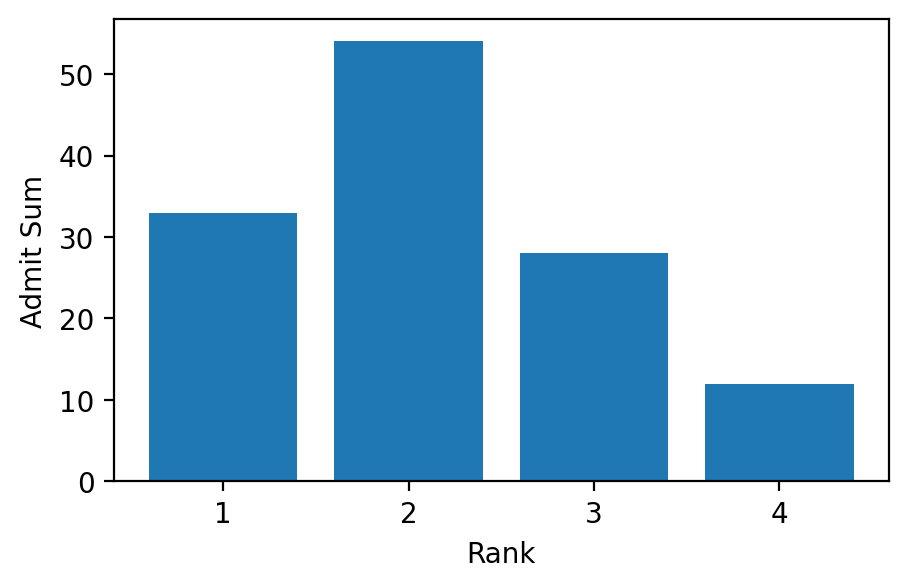

In [35]:
%config InlineBackend.figure_format='retina' # 해상도 설정
tmp = graduate.groupby(by='rank', as_index=False)[['admit']].sum()
plt.figure(figsize=(5, 3))
tmp['rank'] = tmp['rank'].astype(str) # 문자열 형태로 변경
plt.bar(x=tmp['rank'], height=tmp['admit'])
plt.xlabel('Rank')
plt.ylabel('Admit Sum')
plt.show()

10) rank별 합격율을 집계하여 tmp 데이터프레임으로 선언하고 막대그래프로 시각화해 확인하세요.

- admit 열 값이 0, 1이므로 admit 열 평균이 합격율이 됨

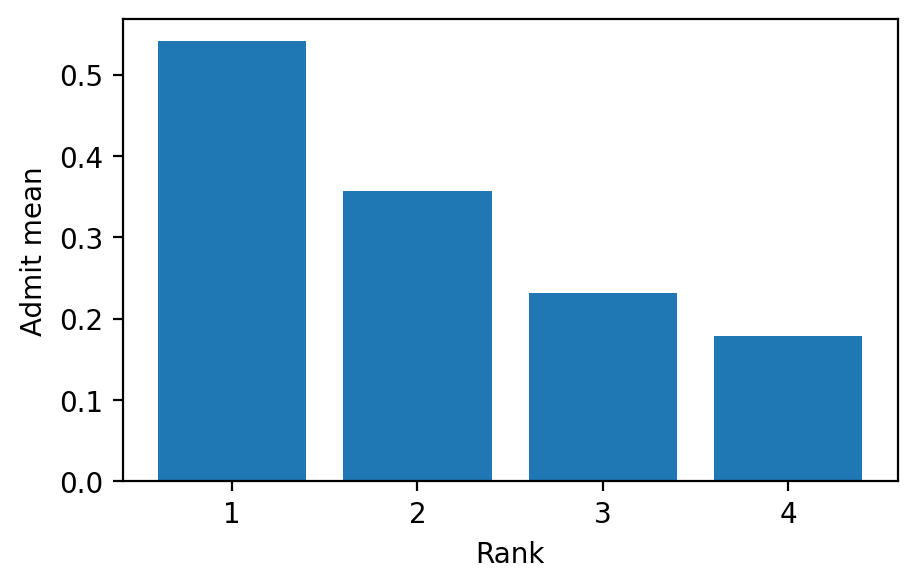

In [37]:
tmp = graduate.groupby(by='rank', as_index=False)['admit'].mean()
plt.figure(figsize=(5, 3))
tmp['rank'] = tmp['rank'].astype(str) # 문자열 형태로 변경
plt.bar(x=tmp['rank'], height=tmp['admit'])
plt.xlabel('Rank')
plt.ylabel('Admit mean')
plt.show()